## Event Window Preprocessing

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#from config import *

In [3]:
import tsai
from tsai.all import *
print('tsai       :', tsai.__version__)
print('fastai     :', fastai.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)

/home/doug/anaconda3/envs/tsai2/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


tsai       : 0.2.17
fastai     : 2.2.7
fastcore   : 1.3.19
torch      : 1.7.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from proto_gen_event_signals import get_sample_data
from proto_preprocess_event_windows import preprocess_sliding_event_window

# Code

# Examples and Tests

In [5]:
help(preprocess_sliding_event_window)

Help on function preprocess_sliding_event_window in module proto_preprocess_event_windows:

preprocess_sliding_event_window(X, y, events, splits=None, folds=None, width=100, offset=None, limit=None, include_empty=False)
    Inputs:
          X: signal data, can be uniform or ragged, with or without channels 
          y: label data 
          events: List of event positions  for each signal  
          width: window size in samples
          offset: start of window vs event, window centered by default
          limit: max windows per signal, 
          include_empty: include randomly selected window if no events
          splits: splits data, will be mapped to windows data if present
          folds:  folds data, will be mapped to windows data if present
          *note: splits and folds are mutually exclusive
    Returns:
          X_win: windows signals 
          y_win: labels for windowed signals
          folds_win or folds_win: Optional, depending on if splits or folds specified


## test case: Uniform 1-d signal

X:(3, 1000)  y:3  events:3


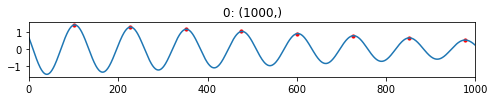

In [6]:
X, y, events = get_sample_data(length=1000, n_sig=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')
i, sig = 0, X[0]

plt.figure(figsize=(8, 1))
plt.title(f'{i}: {sig.shape}')
plt.plot(np.arange(len(sig)), sig)
plt.scatter(events[i], sig[events[i]], c='r', s=10)
plt.xlim(0, len(sig))
plt.show()

X_win:(15, 150)  y_win:15


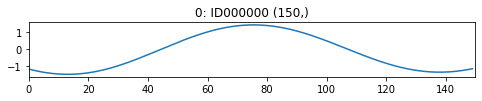

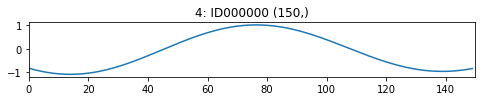

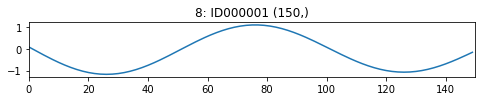

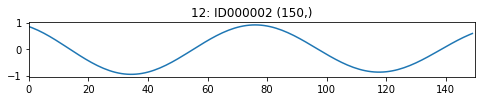

In [7]:
X_win, y_win = preprocess_sliding_event_window(X, y, events, width=150, limit=5)
print(f'X_win:{X_win.shape}  y_win:{len(y_win)}')

for i in range(0, len(X_win), 4):
    sig = X_win[i]
    plt.figure(figsize=(8, 1))
    plt.title(f'{i}: {y_win[i]} {sig.shape}')
    plt.plot(np.arange(len(sig)), sig)
    plt.xlim(0, len(sig))
    plt.show()  

## test case: Uniform 2-d signal

In [8]:
X, y, events = get_sample_data(length=1000, n_sig=3, dims=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')

X_win, y_win = preprocess_sliding_event_window(X, y, events, width=150, limit=5)
print(f'X_win:{X_win.shape}  y_win:{len(y_win)}')

X:(3, 1, 1000)  y:3  events:3
X_win:(15, 1, 150)  y_win:15


## Test case: ragged 1d signal

X:(3,)  y:3  events:3


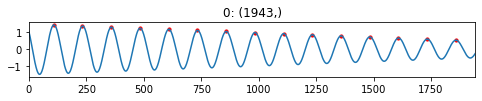

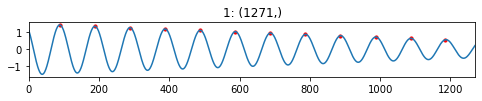

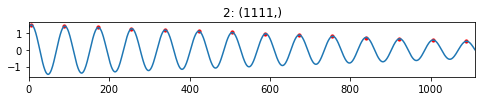

In [9]:
X, y, events = get_sample_data(length=(1000, 2000), n_sig=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')
for i, sig in enumerate(X):
    plt.figure(figsize=(8, 1))
    plt.title(f'{i}: {sig.shape}')
    plt.plot(np.arange(len(sig)), sig)
    plt.scatter(events[i], sig[events[i]], c='r', s=10)
    plt.xlim(0, len(sig))
    plt.show()

X_win:(15, 150)  y_win:15


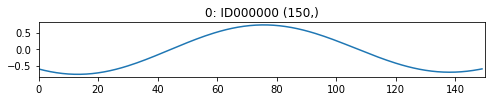

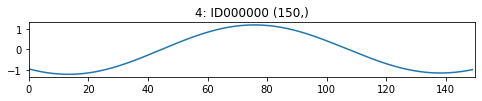

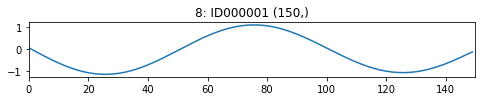

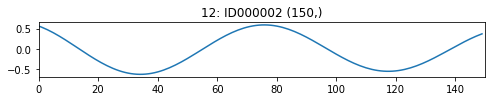

In [10]:
X_win, y_win = preprocess_sliding_event_window(X, y, events, width=150, limit=5)
print(f'X_win:{X_win.shape}  y_win:{len(y_win)}')
for i in range(0, len(X_win), 4):
    sig = X_win[i]
    plt.figure(figsize=(8, 1))
    plt.title(f'{i}: {y_win[i]} {sig.shape}')
    plt.plot(np.arange(len(sig)), sig)
    plt.xlim(0, len(sig))
    plt.show()    

## Test Case Splits

In [11]:
# generate data with splits
X, y, events, splits = get_sample_data(length=1000, n_sig=20, split_pct=(0.2, 0.15))
splits

(#3) [[0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 16, 19],[10, 11, 14, 17],[1, 13, 15, 18]]

In [12]:
X_win, y_win, splits_win = preprocess_sliding_event_window(X, y, events, width=150, limit=2, splits=splits)
splits_win

(#3) [[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 32, 33, 38, 39],[20, 21, 22, 23, 28, 29, 34, 35],[2, 3, 26, 27, 30, 31, 36, 37]]

## Test Case Folds

In [13]:
# generate data with folds
X, y, events, folds = get_sample_data(length=1000, n_sig=20, n_fold=5)
folds

array([1, 4, 3, 3, 4, 1, 0, 2, 0, 0, 4, 3, 4, 2, 1, 0, 1, 3, 2, 2])

In [14]:
X_win, y_win, folds_win = preprocess_sliding_event_window(X, y, events, width=150, limit=2, folds=folds)
folds_win

array([1, 1, 4, 4, 3, 3, 3, 3, 4, 4, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 4, 4,
       3, 3, 4, 4, 2, 2, 1, 1, 0, 0, 1, 1, 3, 3, 2, 2, 2, 2])